##Question 1

Design a convolutional neural network in Keras of at least 10 convolutional layers. Use the MNIST
dataset for evaluation. You must try three designs as detailed below and provide your
observations on the performance of each:

1.	A regular CNN where the number of filters in each layer increases as the depth of the network grows i.e., the Lth layer ill have more filters than the (L-1)th layer.
2.	An inverted CNN where the number of filters in each layer decreases as the depth of the network grows i.e., the Lth layer will have less filters than the (L-1)th layer.
3.	An hour-glass shaped CNN where the number of filters will increase till the Lth layer and reduce afterwards.

Your goal is to design these networks and optimize them to their best performance by choosing
the right hyperparameters for each network, such as the learning rate, batch size and the choice
of optimizer (‘SGD’, ‘adam’, ‘RMSProp’). You must provide a detailed report of what values you
tried for each hyperparameters, your observations on why the network performed well (or not)
and the final accuracy for each network on the MNIST dataset.

You can refer to the Keras documentation for more details.


To whom it may concern, switching 'Runtime' to a GPU will help in the speed of running the following program

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def cnnModel(filters_list):
    #call models.Sequential() to begin creation of model
    model = models.Sequential()

    #for the sake of simplicity while testing different filter sizes, I made a for loop to implement each type of CNN
    for num_filters in filters_list:
        model.add(layers.Conv2D(num_filters, kernel_size=(3, 3), activation='relu', padding='same'))

    #at the end of each model flatten the output
    model.add(layers.Flatten())

    # dense layer to get output
    model.add(layers.Dense(10, activation='softmax'))

    # compile model with optimizer "adam" as specified in pdf, accuracy printed https://keras.io/api/metrics/accuracy_metrics/
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 1. Regular CNN (Increasing Filters)
regular_filters = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
regular_model = cnnModel(regular_filters)

# 2. Inverted CNN (Decreasing Filters)
inverted_filters = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
inverted_model = cnnModel(inverted_filters)

# 3. Hour-Glass Shaped CNN (Increase and Decrease)
hourglass_filters = [32, 64, 128, 256, 512, 512, 256, 128, 64, 32]
hourglass_model = cnnModel(hourglass_filters)

# Train and evaluate models
def train(model, model_name):
    model.fit(x_train, y_train, epochs=10, batch_size=25, validation_data=(x_test, y_test))
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'{model_name} - Test Accuracy: {test_accuracy * 100:.2f}%')


As I worked with different filter sizes I first tried doubling the number of filters, however with too many filters the system loses the gradient and fails. Fortunatley, however, we still see high performance (99%) with filters <=512 in a single layer. I used 10 epochs because time to run is a factor. We also see that with each new implementation accuracy also improves with the greatest accuracy last in the "hourglass" shape. Initially I also used 25 epochs but it just takes forever. Stride is set to 1 just because its the most pain free. kernel size is 3x3 just because its popular in literature as long as you compensate with the appropriate number of filters.

Question 1, Part 1; CNN where number of filters increases as depth of network grows

In [2]:
train(regular_model, "Regular CNN")

Epoch 1/10
938/938 [==============================] - 43s 32ms/step - loss: 0.1314 - accuracy: 0.9595 - val_loss: 0.0510 - val_accuracy: 0.9851
Epoch 2/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0430 - val_accuracy: 0.9872
Epoch 3/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0335 - accuracy: 0.9898 - val_loss: 0.0414 - val_accuracy: 0.9862
Epoch 4/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0339 - val_accuracy: 0.9888
Epoch 5/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0499 - val_accuracy: 0.9872
Epoch 6/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0421 - val_accuracy: 0.9880
Epoch 7/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0388 - val_accuracy:

Question 1, Part 2; CNN where number of filters decreases as depth of network grows

In [ ]:
train(inverted_model, "Inverted CNN")

Epoch 1/10
938/938 [==============================] - 35s 32ms/step - loss: 0.1399 - accuracy: 0.9577 - val_loss: 0.0467 - val_accuracy: 0.9847
Epoch 2/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0401 - val_accuracy: 0.9865
Epoch 3/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0401 - val_accuracy: 0.9875
Epoch 4/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0399 - val_accuracy: 0.9875
Epoch 5/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.0477 - val_accuracy: 0.9876
Epoch 6/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0372 - val_accuracy: 0.9892
Epoch 7/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0343 - val_accuracy:

Question 1, Part 3; CNN where number of filters takes the shape of an hourglass

In [ ]:
train(hourglass_model, "Hour-Glass CNN")

Epoch 1/10
938/938 [==============================] - 170s 169ms/step - loss: 0.1623 - accuracy: 0.9500 - val_loss: 0.0401 - val_accuracy: 0.9877
Epoch 2/10
938/938 [==============================] - 153s 163ms/step - loss: 0.0501 - accuracy: 0.9848 - val_loss: 0.0375 - val_accuracy: 0.9885
Epoch 3/10
938/938 [==============================] - 151s 161ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0430 - val_accuracy: 0.9870
Epoch 4/10
938/938 [==============================] - 152s 162ms/step - loss: 0.0286 - accuracy: 0.9915 - val_loss: 0.0261 - val_accuracy: 0.9914
Epoch 5/10
938/938 [==============================] - 149s 159ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0411 - val_accuracy: 0.9872
Epoch 6/10
938/938 [==============================] - 152s 163ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0349 - val_accuracy: 0.9899
Epoch 7/10
938/938 [==============================] - 149s 158ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.0328 -

##Question 2

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

def LeNetModel(learning_rate, batch, pool_size, stride, kernel_size):

  # Load the CIFAR-10 dataset
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  # Normalize
  x_train, x_test = x_train / 255.0, x_test / 255.0
  y_train = to_categorical(y_train, 10)
  y_test = to_categorical(y_test, 10)

  # Create the LeNet model
  model = models.Sequential()

  # Layer 1: convolutional layer with 6 kernels of 5x5 and stride 1
  model.add(layers.Conv2D(6, kernel_size=(kernel_size,kernel_size), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))

  # Layer 2: max-pooling layer with 2x2 kernels and stride 2
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # Layer 3: convolutional layer with 16 kernels of 5x5 and stride 1
  model.add(layers.Conv2D(16, kernel_size=(kernel_size,kernel_size), strides=(1, 1), activation='relu'))

  # Layer 4: max-pooling layer with 2x2 kernels and stride 2
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # Layer 5: convolutional layer with 120 kernels of 5x5
  model.add(layers.Conv2D(120, kernel_size=(kernel_size,kernel_size), activation='relu'))

  # Flatten the layers
  model.add(layers.Flatten())

  # Layer 6: Dense Layer with 84 neurons
  model.add(layers.Dense(84, activation='relu'))

  # Layer 7: Output Layer
  model.add(layers.Dense(10, activation='softmax'))

  # Compile the model with the 'Adam' optimizer
  optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  # Train the model for 25 epochs
  h = model.fit(x_train, y_train, epochs=25, batch_size=batch, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
  return h

1. What is the effect of learning rate on the training process? Which performed best?

Training with learning rate = 1e-07
Epoch 1/25
2000/2000 [==============================] - 20s 5ms/step - loss: 2.3059 - accuracy: 0.0866 - val_loss: 2.3060 - val_accuracy: 0.0909
Epoch 2/25
2000/2000 [==============================] - 16s 8ms/step - loss: 2.3054 - accuracy: 0.0878 - val_loss: 2.3055 - val_accuracy: 0.0928
Epoch 3/25
2000/2000 [==============================] - 14s 7ms/step - loss: 2.3050 - accuracy: 0.0899 - val_loss: 2.3051 - val_accuracy: 0.0926
Epoch 4/25
2000/2000 [==============================] - 10s 5ms/step - loss: 2.3046 - accuracy: 0.0927 - val_loss: 2.3048 - val_accuracy: 0.0962
Epoch 5/25
2000/2000 [==============================] - 10s 5ms/step - loss: 2.3042 - accuracy: 0.0943 - val_loss: 2.3044 - val_accuracy: 0.0969
Epoch 6/25
2000/2000 [==============================] - 10s 5ms/step - loss: 2.3038 - accuracy: 0.0960 - val_loss: 2.3040 - val_accuracy: 0.0988
Epoch 7/25
2000/2000 [==============================] - 12s 6ms/step - loss: 2.3035 - accuracy

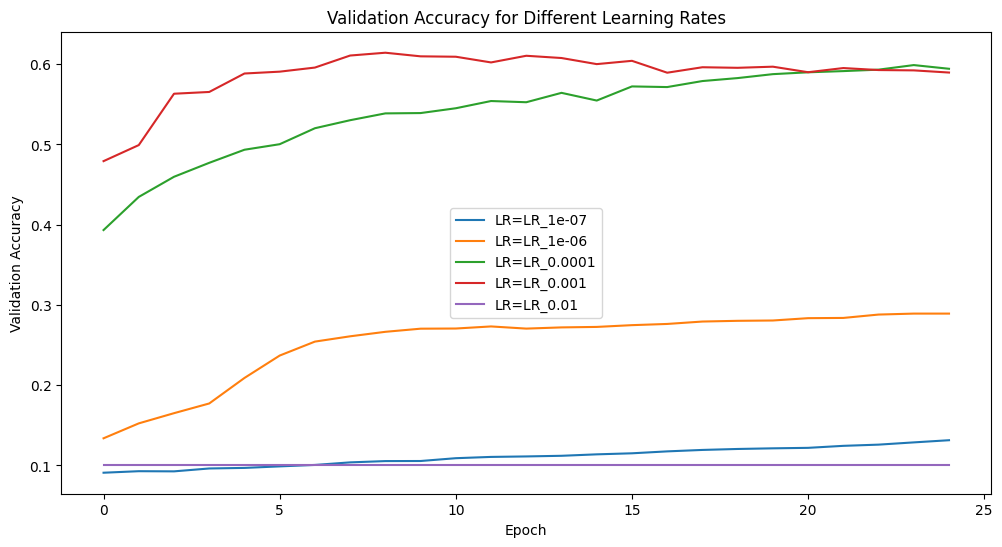

In [4]:
learning_rates = [0.0000001,0.000001, 0.0001, 0.001, 0.01]  # Define a list of learning rates to test
batch = 25
kernel_size = 5
pool_size = 2
stride = 1
kernel_size = 5
# Create a dictionary to store histories for each learning rate
histories = {}

# For loop to train the model for each learning rate and store the history
for lr in learning_rates:
    print(f"Training with learning rate = {lr}")
    history = LeNetModel(lr, batch, pool_size, stride, kernel_size)
    histories[f'LR_{lr}'] = history

# Plot the learning curves vs val accuracy
plt.figure(figsize=(12, 6))

for lr, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'LR={lr}')

plt.title('Validation Accuracy for Different Learning Rates')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

plt.legend()
plt.show()

As seen by the above graph there are clear decreasing marginal returns to lowering learning rate. If you pick one too high you step over potential minimum, if your step is too small you never get to the minimums. We found our best accuracy at lr = 0.001

2. What is the effect of batch size on the training process? Which performed best?

Training with Batch size.  = 10
Epoch 1/25
5000/5000 [==============================] - 26s 5ms/step - loss: 1.5674 - accuracy: 0.4267 - val_loss: 1.4261 - val_accuracy: 0.4872
Epoch 2/25
5000/5000 [==============================] - 24s 5ms/step - loss: 1.3353 - accuracy: 0.5216 - val_loss: 1.2688 - val_accuracy: 0.5435
Epoch 3/25
5000/5000 [==============================] - 24s 5ms/step - loss: 1.2404 - accuracy: 0.5577 - val_loss: 1.2541 - val_accuracy: 0.5477
Epoch 4/25
5000/5000 [==============================] - 23s 5ms/step - loss: 1.1730 - accuracy: 0.5808 - val_loss: 1.2089 - val_accuracy: 0.5732
Epoch 5/25
5000/5000 [==============================] - 24s 5ms/step - loss: 1.1091 - accuracy: 0.6047 - val_loss: 1.1899 - val_accuracy: 0.5783
Epoch 6/25
5000/5000 [==============================] - 25s 5ms/step - loss: 1.0644 - accuracy: 0.6221 - val_loss: 1.2238 - val_accuracy: 0.5776
Epoch 7/25
5000/5000 [==============================] - 25s 5ms/step - loss: 1.0239 - accuracy: 0.

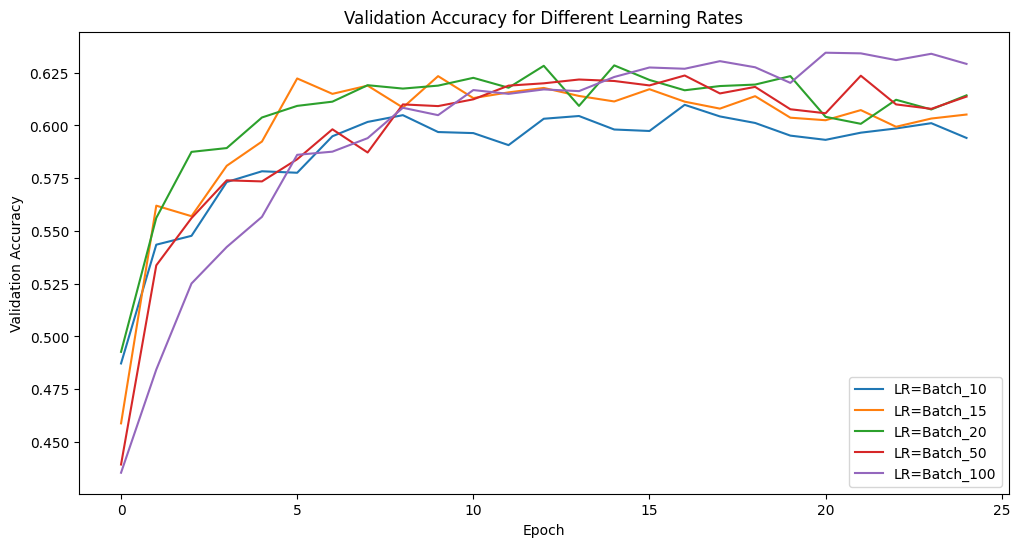

In [5]:
lr = 0.001  # Define different batch sizes to test
batches = [10, 15, 20, 50, 100]
kernel_size = 5
pool_size = 2
stride = 1
kernel_size = 5
# Create a dictionary to store histories for each batch size
histories = {}

# For loop to train the model for each batch size and store the history
for batch in batches:
    print(f"Training with Batch size.  = {batch}")
    history = LeNetModel(lr, batch, pool_size, stride, kernel_size)
    histories[f'Batch_{batch}'] = history

# Plot the learning curves vs val accuracy
plt.figure(figsize=(12, 6))

for batch, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'LR={batch}')

#add title
plt.title('Validation Accuracy for Different Learning Rates')
#subheadings
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

plt.legend()
plt.show()

As seen in the graph above as the number of epochs increases larger batch sizes will outperform smaller ones.

3. Try different hyperparameters to obtain the best accuracy on the test set. What is your best performance and what were the hyperparameters?

The hyper parameters I tested were the size of kernels, length of strides and pool size. I did not test number of kernels, since I spoke about that in number 1 and they were specified in the problem description. All parameters affect speed and performance, stride affects how much time the model spends on pigments.

4. Implement an equivalent feed forward network for the same task with each hidden layer
containing the same number of neurons as the number of filters in each convolution layer.
Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of
25 epochs. Compare its performance with your LeNet implementation based on the
following questions:

    a. What is its performance?

    b. How many parameters are there in this network compared to the LeNet implementation? Are they worth it?

In [6]:
# Load and the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the LeNet model
model = models.Sequential()

# Layer 1: convolutional layer with the same number of neurons as filters (25)
model.add(layers.Conv2D(25, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))

# Layer 2: max-pooling layer with 2x2 kernels and stride 2
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 3: convolutional layer with the same number of neurons as filters (25)
model.add(layers.Conv2D(25, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

# Layer 4: max-pooling layer with 2x2 kernels and stride 2
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 5: convolutional layer with the same number of neurons as filters (25)
model.add(layers.Conv2D(25, kernel_size=(5, 5), activation='relu'))

# Flatten the layers
model.add(layers.Flatten())

# Layer 6: Dense Layer with 84 neurons
model.add(layers.Dense(84, activation='relu'))

# Layer 7: Output Layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with the 'Adam' optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and print test acc
model.fit(x_train, y_train, epochs=25, batch_size=25, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/25
2000/2000 [==============================] - 12s 5ms/step - loss: 1.9154 - accuracy: 0.2943 - val_loss: 1.7083 - val_accuracy: 0.3797
Epoch 2/25
2000/2000 [==============================] - 10s 5ms/step - loss: 1.6414 - accuracy: 0.4001 - val_loss: 1.5680 - val_accuracy: 0.4276
Epoch 3/25
2000/2000 [==============================] - 10s 5ms/step - loss: 1.5345 - accuracy: 0.4408 - val_loss: 1.5028 - val_accuracy: 0.4544
Epoch 4/25
2000/2000 [==============================] - 10s 5ms/step - loss: 1.4614 - accuracy: 0.4714 - val_loss: 1.4181 - val_accuracy: 0.4833
Epoch 5/25
2000/2000 [==============================] - 10s 5ms/step - loss: 1.4051 - accuracy: 0.4947 - val_loss: 1.3770 - val_accuracy: 0.4961
Epoch 6/25
2000/2000 [==============================] - 10s 5ms/step - loss: 1.3589 - accuracy: 0.5101 - val_loss: 1.3748 - val_accuracy: 0.5016
Epoch 7/25
2000/2000 [==============================] - 10s 5ms/step - loss: 1.3159 - accuracy: 0.5275 - val_loss: 1.3092 - val_ac

Test accuracy was 64%, There are 25 parameters in 25 filters in each layer for a total number of 1875 parameters in the convolutionary layers given the test accuracy I would say they are not worth it.

Question was done by hand-ish, I used a calculator for mult/addition.

![Screenshot 2023-10-25 223224.png](<attachment:Screenshot 2023-10-25 223224.png>)
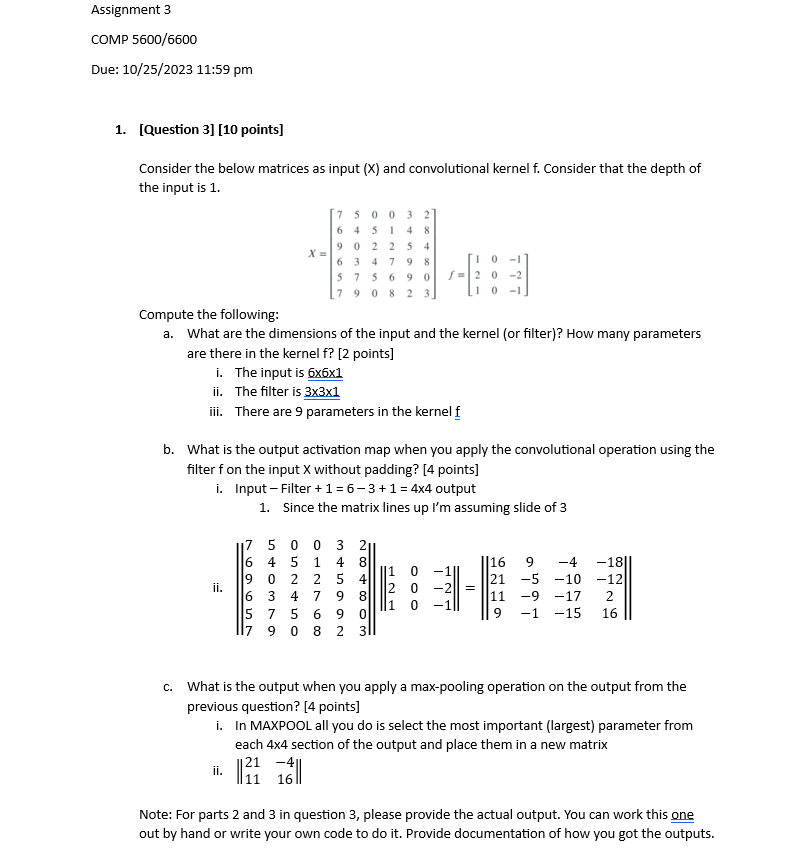